Name: Amit Prakash
Reg No.:39110055
Email:amit007prakash@gmail.com

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/bank-additional-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.shape

(41188, 21)

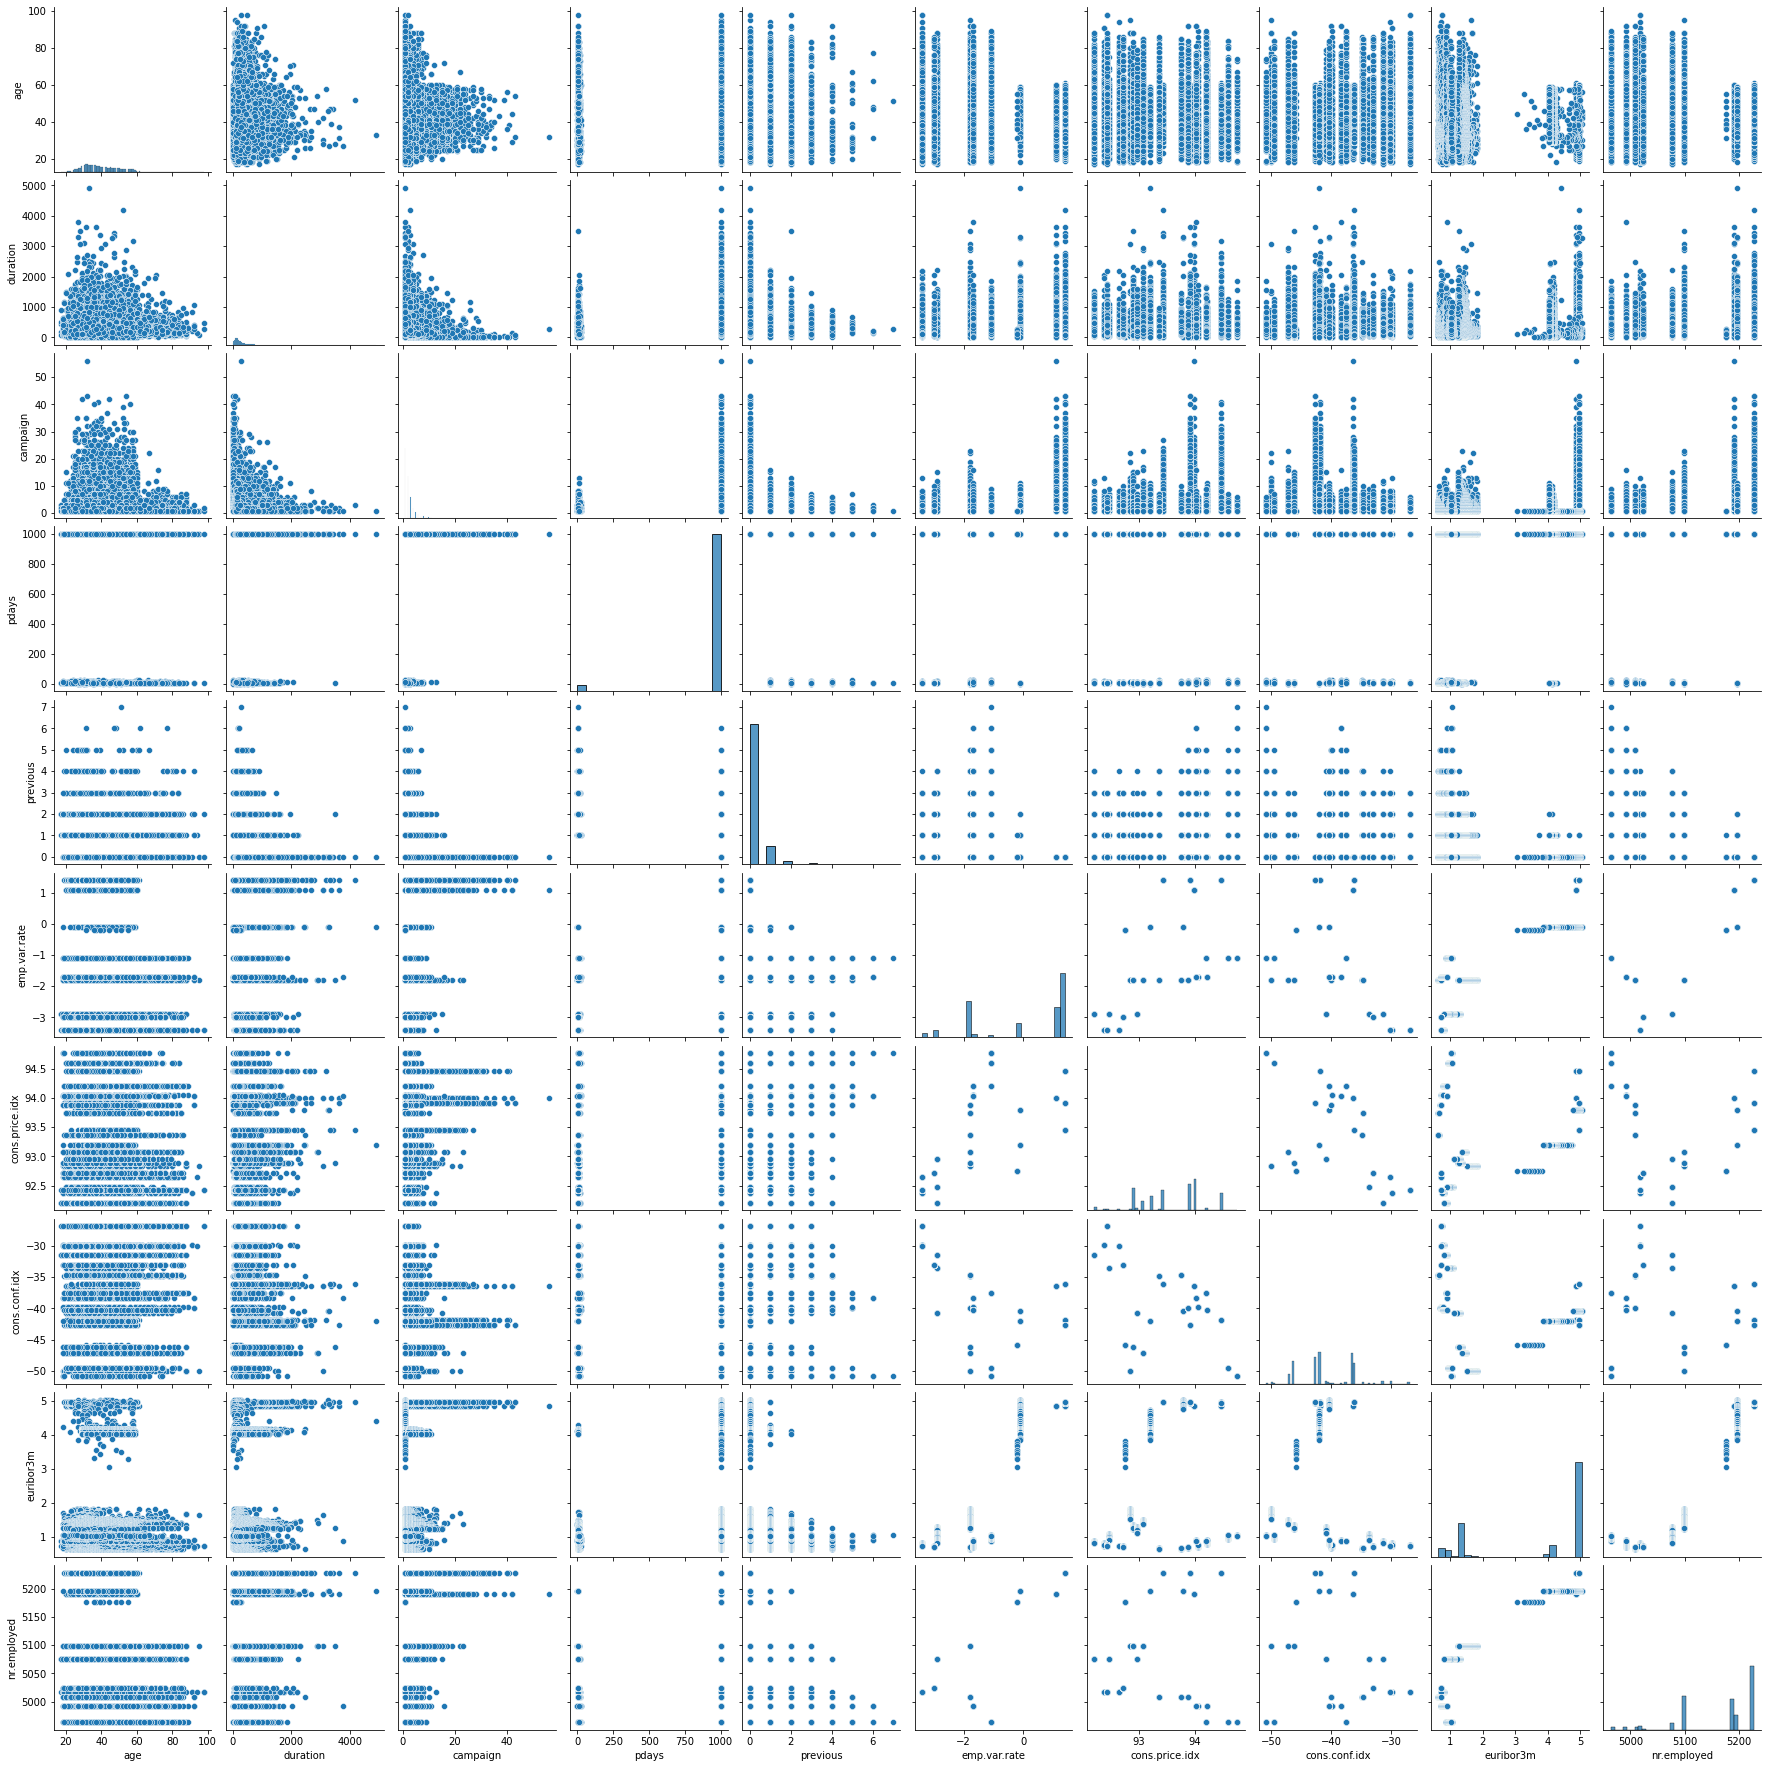

In [7]:
sns.pairplot(data)

In [8]:
data['y'] = data['y'].map({'yes':1,"no":0}) #encoding y

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [11]:
data.shape

(41188, 21)

In [12]:
data_categoryCols = data.columns[data.dtypes=='object']

In [13]:
data_categoryCols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [14]:
data_numericCols = data.columns[data.dtypes != 'object']

In [15]:
data_numericCols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
data_cat = data[data_categoryCols]
data_num = data[data_numericCols]

In [17]:
data_cat.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent


In [18]:
data_num.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


change object data to category

In [19]:
data_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [20]:
data_cat['job'] = data_cat['job'].astype('category')
data_cat['marital'] = data_cat['marital'].astype('category')
data_cat['education'] = data_cat['education'].astype('category')
data_cat['default'] = data_cat['default'].astype('category')
data_cat['housing'] = data_cat['housing'].astype('category')
data_cat['loan'] = data_cat['loan'].astype('category')
data_cat['contact'] = data_cat['contact'].astype('category')
data_cat['month'] = data_cat['month'].astype('category')
data_cat['day_of_week'] = data_cat['day_of_week'].astype('category')
data_cat['poutcome'] = data_cat['poutcome'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [21]:
data_cat['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [22]:
data_cat.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
dtype: object

convert category to num(0,1,2,3...) as per need

In [23]:
data_cat['job']= data_cat['job'].cat.codes
data_cat['marital']= data_cat['marital'].cat.codes
data_cat['education']= data_cat['education'].cat.codes
data_cat['default']= data_cat['default'].cat.codes
data_cat['housing']= data_cat['housing'].cat.codes
data_cat['loan']= data_cat['loan'].cat.codes
data_cat['contact']= data_cat['contact'].cat.codes
data_cat['month']= data_cat['month'].cat.codes
data_cat['day_of_week']= data_cat['day_of_week'].cat.codes
data_cat['poutcome']= data_cat['poutcome'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [24]:
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [25]:
data_cat.dtypes

job            int8
marital        int8
education      int8
default        int8
housing        int8
loan           int8
contact        int8
month          int8
day_of_week    int8
poutcome       int8
dtype: object

merge

In [26]:
data_final = pd.concat([data_cat,data_num],join='outer',axis =1)
data_final.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,1,0,0,0,0,1,6,1,1,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,7,1,3,1,0,0,1,6,1,1,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,7,1,3,0,2,0,1,6,1,1,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,1,0,0,0,1,6,1,1,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,7,1,3,0,0,2,1,6,1,1,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
x = data_final.iloc[:,:-1]
y = data_final.iloc[:,-1]

In [28]:
x.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,1,0,0,1,6,1,1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,2,0,1,6,1,1,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,0,1,6,1,1,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,2,1,6,1,1,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [29]:
import sklearn 
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,test_size = 0.30,random_state=10)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = LogisticRegression()
#model = LinearRegression()
#model = KNeighborsClassifier()
#model = RandomForestClassifier()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
model.coef_

array([[-0.00918409,  0.02976111,  0.08675854, -0.0318459 ,  0.01227019,
        -0.00399636, -0.04381666, -0.0731518 ,  0.0248515 ,  0.00890211,
         0.00556693,  0.00465783, -0.06655466, -0.00163622,  0.01053669,
        -0.2620601 ,  0.22386894,  0.04111422, -0.2799828 , -0.0040812 ]])

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score # accuracy

In [36]:
print(sklearn.metrics.accuracy_score(ytest,ypred))
#Accuracy = sklearn.metrics.r2_score(ytest,ypred)
#print(Accuracy)

0.9053168244719592


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
final_model = RandomForestClassifier()
final_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [39]:
yFinalPred = final_model.predict(xtest)
yFinalPred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
print(sklearn.metrics.accuracy_score(ytest,yFinalPred))

0.9128429230395727


**LogisticRegression**

*   Accuracy - 0.9053168244719592

**LinearRegression**

*   Accuracy - 0.33156239392160924 

**KNeighborsClassifier**

*   Accuracy - 0.9038601602330663

**RandomForest**

*   Accuracy - 0.911143481427531




By far the best model which we got is Random forest

In [41]:
import sklearn

In [42]:
RMSE = sklearn.metrics.mean_squared_error(ytest,yFinalPred)
print(RMSE)

0.0871570769604273
